In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loans_full_schema.csv')

In [3]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


### One problem may be that the values in the column "annual_income" and "deby_to_income" are needed to be standardized to make sure they are on the same scale before building models.
### Second, there are some null values in some numeric columns, we can dealing with those values by replacing them with the average values.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### The total balance of each state

In [5]:
df1 = df.groupby('state').sum()['balance'].reset_index()

Text(0, 0.5, 'Sum of Balance')

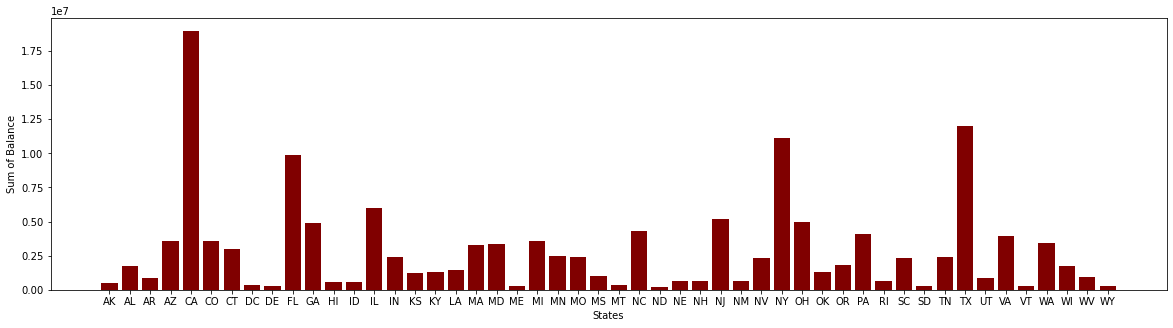

In [6]:
fig = plt.figure(figsize = (20, 5))
plt.bar(df1['state'], df1['balance'], color = 'maroon')
plt.xlabel('States')
plt.ylabel('Sum of Balance')

In [7]:
df['state'].value_counts()

CA    1330
TX     806
NY     793
FL     732
IL     382
OH     338
NJ     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MO     159
MN     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
MT      24
DE      24
VT      23
SD      20
DC      19
WY      19
ND      14
Name: state, dtype: int64

### In the above chart, CA has the highest balance. It may be due to that most of the loans data are from CA.

In [8]:
df['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [9]:
df2 = df[df['disbursement_method']=='Cash'][["paid_late_fees",'disbursement_method']]
df2

,paid_late_fees,disbursement_method
0,0.0,Cash
1,0.0,Cash
2,0.0,Cash
3,0.0,Cash
4,0.0,Cash
...,...,...
9995,0.0,Cash
9996,0.0,Cash
9997,0.0,Cash
9998,0.0,Cash


In [10]:
cnt_c = df[df['disbursement_method']=='Cash']['disbursement_method'].count()

In [11]:
df3 = df[df['disbursement_method']=='DirectPay'][["paid_late_fees",'disbursement_method']]
df3

,paid_late_fees,disbursement_method
13,0.0,DirectPay
59,0.0,DirectPay
89,0.0,DirectPay
97,0.0,DirectPay
106,0.0,DirectPay
...,...,...
9946,0.0,DirectPay
9957,0.0,DirectPay
9959,0.0,DirectPay
9963,0.0,DirectPay


In [12]:
cnt_dp = df[df['disbursement_method']=='DirectPay']['disbursement_method'].count()

In [13]:
y = np.array([cnt_c, cnt_dp])
lb = ['Cash', 'DirectPay']

### Pie Chart for The "disbursement_method" Column

([<matplotlib.patches.Wedge at 0x7f7a7b490880>,
 [Text(-1.0722887078643675, 0.24535062051391937, 'Cash'),
  Text(1.0722886906358275, -0.24535069581010488, 'DirectPay')],
 [Text(-0.5848847497442003, 0.13382761118941056, '92.8%'),
  Text(0.584884740346815, -0.1338276522600572, '7.2%')])

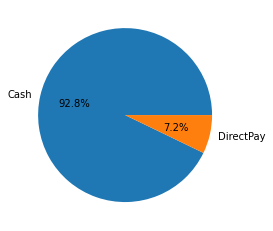

In [14]:
plt.pie(y, labels = lb, autopct='%1.1f%%')

Text(0.5, 0, 'paid_late_fees')

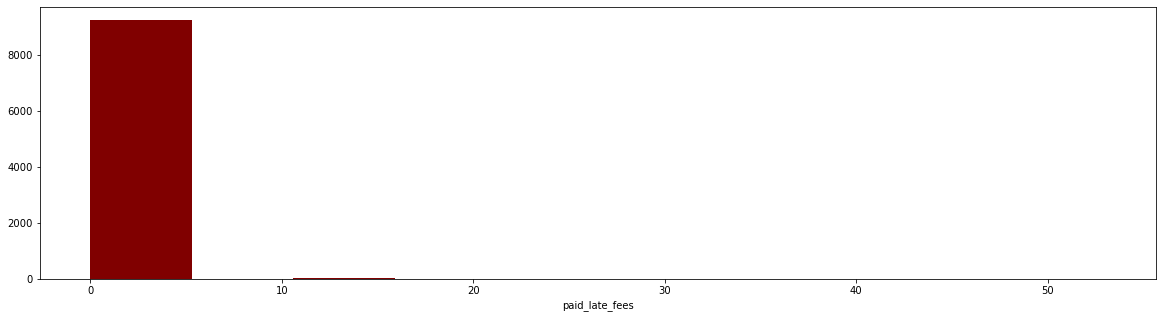

In [15]:
fig = plt.figure(figsize = (20, 5))
plt.hist(df2['paid_late_fees'], color = 'maroon')
plt.xlabel('paid_late_fees')

In [16]:
df2['paid_late_fees'].mean()

0.12245691512580782

In [17]:
# Remove the zeros
df2[df2['paid_late_fees'] != 0].mean()

paid_late_fees    23.201837
dtype: float64

Text(0.5, 0, 'paid_late_fees')

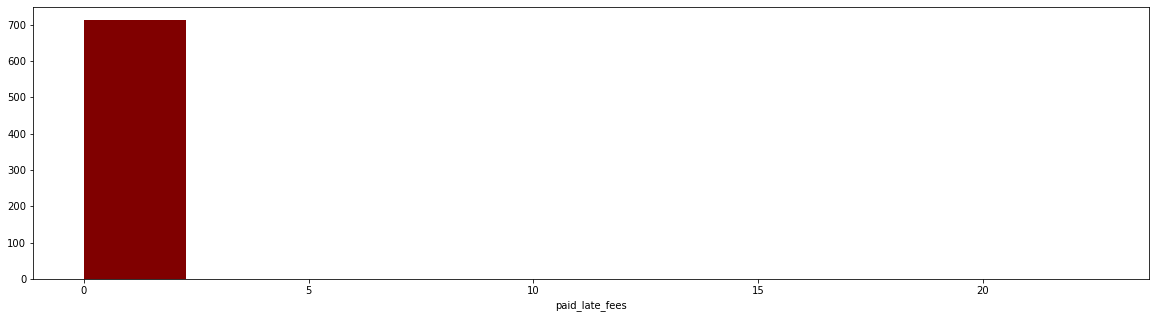

In [18]:
fig = plt.figure(figsize = (20, 5))
plt.hist(df3['paid_late_fees'], color = 'maroon')
plt.xlabel('paid_late_fees')

In [19]:
df3['paid_late_fees'].mean()

0.0813826815642458

In [20]:
# Remove the zeros
df3[df3['paid_late_fees'] != 0].mean()

paid_late_fees    19.423333
dtype: float64

### From the charts above, we can know that most of the disbursement method is Cash, but average paid_late_fees is lower with the direct pay disbursement method. Clients tend to pay on time with the direct pay method.

In [21]:
df['homeownership'].unique()


array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [22]:
cnt_m = df[df['homeownership'] == 'MORTGAGE']['homeownership'].count()

In [23]:
cnt_r = df[df['homeownership'] == 'RENT']['homeownership'].count()

In [24]:
cnt_o = df[df['homeownership'] == 'OWN']['homeownership'].count()

In [25]:
y = np.array([cnt_m, cnt_r, cnt_o])
lb = ['Mortgage', 'Rent', 'Own']

([<matplotlib.patches.Wedge at 0x7f7a771d0850>,
 [Text(0.07617498317964826, 1.147474344784048, 'Mortgage'),
  Text(-0.5189935839231494, -0.969868887967134, 'Rent'),
  Text(1.0021164955234036, -0.45361054815765933, 'Own')],
 [Text(0.04305542527545336, 0.6485724557475053, '47.9%'),
  Text(-0.28308740941262694, -0.5290193934366185, '38.6%'),
  Text(0.5466089975582201, -0.24742393535872326, '13.5%')])

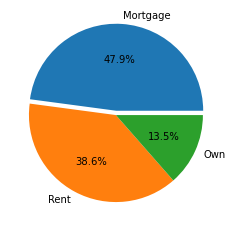

In [26]:
plt.pie(y, labels = lb, autopct='%1.1f%%', explode = [0.05, 0, 0]) 

### We can see most of the loans are related to mortgage. We can do more analysis on each part separately.

## We can do more analysis on some columns and display on a dashboard so that we can see all the changes together. If I have more time, I will take a look on the columns which are related to income. Those will definately be the important features that would have impact on loan data.

## For the feature selection, I will select all the numerical data and standardize them. Besides, for the categorical data, I will choose "homeownership", "emp_title", "verified_income", and "disbursement_method". I will encode them first before building the models.

## Since we are going to predict the interest rate, which is numerical, I will choose regression models and decision trees. However, I do not have enough time to complete this parts. If I have more time, I will be very interested to see the results.